In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from cleanupFile import groupingDictionary_common, cleanUp
# plt.rcParams['figure.figsize'] = (20,15)

In [22]:
groupingDictionary = {
    "Distraction" : ["Driver Inattention/Distraction", "Outside Car Distraction", "Passenger Distraction", "Glare", "Cell Phone (hand-held)", "Cell Phone (hands-free)", "Other Electronic Device"], 
    "Car Defects" : ["Accelerator Defective", "Brakes Defective", "Headlights Defective", "Other Lighting Defects", "Steering Failure", "Tire Failure/Inadequate", "Tow Hitch Defective", "Windshield Inadequate"],
    "Substance Abuse" : ["Alcohol Involvement", "Drugs (Illegal)", "Prescription Medication"],
    "Driver not at fault" : ["Animals Action", "Lane Marking Improper/Inadequate", "Obstruction/Debris", "Other Vehicular", "Pavement Defective", "Pavement Slippery", "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", "Reaction to Other Uninvolved Vehicle", "Shoulders Defective/Improper", "Traffic Control Device Improper/Non-Working", "View Obstructed/Limited"], 
    "Driver Inexperience" : ["Driver Inexperience"], 
    "Medical/Fatigue" : ["Fatigued/Drowsy", "Fell Asleep", "Illness", "Lost Consciousness", "Physical Disability"], 
    "Traffic Rule Violation" : ["Aggressive Driving/Road Rage", "Backing Unsafely", "Failure to Keep Right", "Failure to Yield Right-of-Way", "Following Too Closely", "Oversized Vehicle", "Passing Too Closely", "Passing or Lane Usage Improper", "Traffic Control Disregarded", "Turning Improperly", "Unsafe Lane Changing", "Unsafe Speed"]
}

In [23]:
def make_series(df: pd.DataFrame):

    groupingDictionary = groupingDictionary_common

    df1 = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != "Unspecified"]
    df1 = df1.sort_values(by=['CONTRIBUTING FACTOR VEHICLE 1'])
    df_temp1 = df1.groupby(by=['CONTRIBUTING FACTOR VEHICLE 1'])
    s3 = df_temp1.size()

    df2 = df[df['CONTRIBUTING FACTOR VEHICLE 2'] != "Unspecified"]
    df2 = df2.sort_values(by=['CONTRIBUTING FACTOR VEHICLE 2'])
    df_temp2 = df2.groupby(by=['CONTRIBUTING FACTOR VEHICLE 2'])
    s4 = df_temp2.size()

    df_equal = df[df['CONTRIBUTING FACTOR VEHICLE 1'] == df['CONTRIBUTING FACTOR VEHICLE 2']]
    df_equal = df_equal[df_equal['CONTRIBUTING FACTOR VEHICLE 1'] != "Unspecified"]
    df_equal = df_equal.sort_values(by=['CONTRIBUTING FACTOR VEHICLE 1'])
    df_equal_temp = df_equal.groupby(by=['CONTRIBUTING FACTOR VEHICLE 1'])
    s5 = df_equal_temp.size()
    s_total_ = s3.add(s4, fill_value=0)
    s_total = s_total_.sub(s5, fill_value=0)

    dc = {}
    for i in groupingDictionary.keys():
        dc[i] = 0

    for i in groupingDictionary.keys():
        for j in groupingDictionary[i]:
            if (j in s_total.index):
                dc[i] += s_total[j]

    return pd.Series(dc)



def plot_series(s_total: pd.Series, name="New York City"):

    bars = s_total.index
    x_pos = range(len(s_total))
    plt.bar(x_pos, s_total.values, width=0.8)
    plt.xlabel("Cause of accident", fontsize=15)
    plt.ylabel("Accidents", fontsize=15)
    plt.title(f"Accidents by type in {name}", fontsize=15)
    plt.xticks(x_pos, bars, fontsize=10, rotation=80)
    plt.yticks(fontsize=10)
    for i in range(len(s_total)):
        plt.text(i, s_total.astype('int32')[i], s_total.astype('int32')[i], ha='center', bbox = dict(facecolor = 'white', alpha =.8), fontsize=10)
    plt.show()

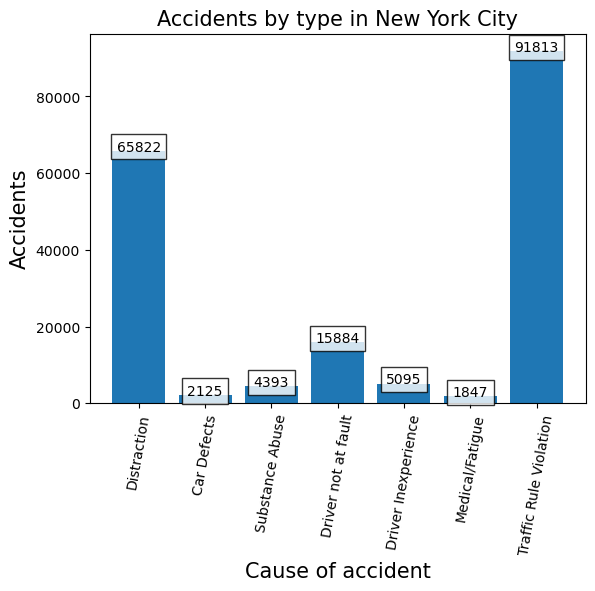

/tmp/ipykernel_4501/1097762281.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


BRONX
BROOKLYN
MANHATTAN
QUEENS
STATEN ISLAND


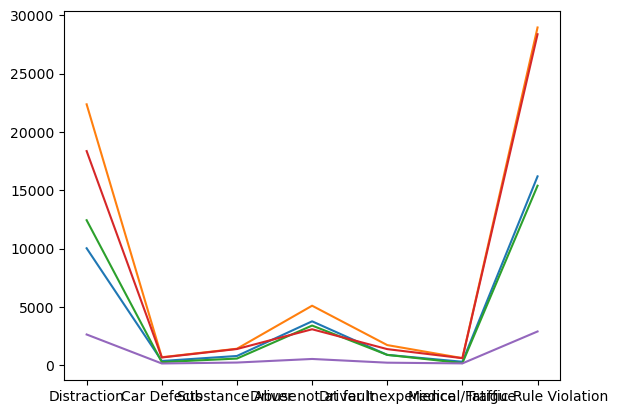

In [27]:
df = pd.read_csv("Dataset5.csv")
cleanUp(df)

s = make_series(df)
plot_series(s)

groups = df.groupby(by=['BOROUGH'])
for name, group in groups:
    s = make_series(group)
    print(name)
    plt.plot(s)

plt.show()